# Fit a RL model on hierarchical data

In [1]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_RL import RLModel_2A


## Import the data

In [2]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = RLModel_2A(hierarchical_levels = 2,
                   increasing_sensitivity = False,
                   separate_learning_rates = True)

15:11:49 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr
15:11:58 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr
15:11:58 - cmdstanpy - WARNING - Stan compiler has produced 13 warnings:
15:11:58 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 5, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-forma

## Fit

In [4]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # initial learning value (Q0)

In [5]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

15:11:58 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
sensitivity_priors {'mu_mu': 1, 'sd_mu': 30, 'mu_sd': 0, 'sd_sd': 30}
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:16:53 - cmdstanpy - INFO - CmdStan done processing.
15:16:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: bernoulli_lpmf: Probability parameter[959] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
	Exception: bernoulli_lpmf: Probability parameter[959] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
	Exception: bernoulli_lpmf: Probability parameter[959] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
	Exception: bernoulli_lpmf: Probability parameter[720] is -nan, but must be in the interval [0, 1] (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RL_2A/hierRL_2A_2lr.stan', line 99, column 1 to column 36)
Consider re-runn


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 6000 iterations ended with a divergence (0.0%)


### get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,12871.000000
mean,1.000179
std,0.001133
min,0.999667
25%,0.999775
50%,0.999924
75%,1.000200
max,1.012250


### get wAIC

In [7]:
model_fit.waic

{'lppd': -2586.199890017665,
 'p_waic': 49.146709620486476,
 'waic': 5270.693199276303,
 'waic_se': 90.3728029619694}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_sensitivity,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],alpha_pos_sbj[6],alpha_pos_sbj[7],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.059772,0.241207,0.335960,0.042923,0.013061,0.070617,0.101310,0.102382,0.066652,0.069979,...,0.084019,0.312014,0.374748,0.765107,0.589039,0.899699,0.428241,0.602541,0.083684,0.248301
std,0.011379,0.035523,0.047550,0.021717,0.005817,0.038928,0.043363,0.043222,0.034697,0.027255,...,0.051639,0.073193,0.057651,0.173695,0.115500,0.194285,0.080752,0.146185,0.020291,0.048236
min,0.026884,0.140145,0.181943,0.005466,0.003101,0.001327,0.018354,0.019566,0.012824,0.006920,...,0.014466,0.152383,0.225073,0.371112,0.305129,0.401307,0.206465,0.227346,0.029752,0.119050
25%,0.051580,0.216138,0.303073,0.028901,0.009261,0.048463,0.070227,0.071997,0.042411,0.050698,...,0.059740,0.257709,0.335259,0.648303,0.508133,0.762330,0.374257,0.498657,0.070005,0.215866
50%,0.058710,0.239158,0.332733,0.037462,0.011571,0.067267,0.093084,0.094741,0.058642,0.065445,...,0.072083,0.302492,0.369698,0.738715,0.576653,0.876370,0.418133,0.591322,0.082291,0.242373
75%,0.066804,0.264129,0.366141,0.052028,0.015242,0.091317,0.122757,0.124943,0.080952,0.085579,...,0.088323,0.354660,0.408816,0.845988,0.654382,1.014782,0.469417,0.689439,0.094973,0.273883
max,0.120021,0.397939,0.526107,0.222305,0.072620,0.290350,0.364800,0.388157,0.344969,0.237798,...,0.877706,0.780767,0.757121,2.101460,1.218780,1.898810,0.985064,1.428580,0.296831,0.662627


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

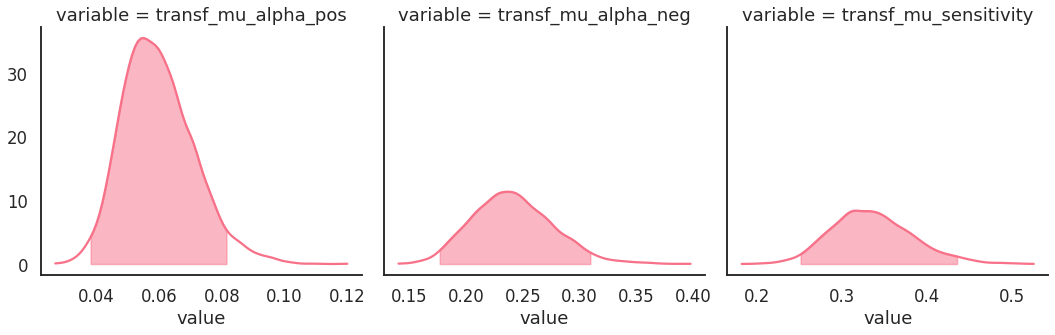

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=500)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               0    1    1    1    0    1    0    1    0    1  ...    1    1   
2               0    1    1    0    0    1    1    1    1    1  ...    1    1   
3               1    0    1    0    1    0    0    1    1    1  ...    1    1   
4               1    0    0    1    1    1    0    1    1    1  ...    0    1   
5               0    1    0    1    0    1    1    0    1    1  ...    0    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
496             1    1    0    0    1    0    1    0    0    0  ...    0    1   
497             1    1    1    1    1    1    0    1    1    1  ...    1    1   
498             0    1    1    0    1    0    0    0    1    1  ...    1    1   
499             1    1    1    1    0    1    1    0    0    1  ...    1    1   
500             1    0    1    1    1    1    0    1    0    1  ...    1    0   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    0    1    0    1    1  
2           1    1    1    1    0    1    1    0  
3           1    1    1    1    1    1    1    1  
4           1    1    1    1    1    1    1    1  
5           1    1    1    0    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
496         1    1    1    1    1    1    1    0  
497         1    1    1    1    1    0    1    0  
498         1    1    1    1    1    0    1    1  
499         1    1    1    1    1    1    1    1  
500         1    0    1    0    1    1    1    1  

[500 rows x 6464 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=500)
pp_summary

,mean_accuracy
sample,
1,0.798577
2,0.797958
3,0.794554
4,0.805693
5,0.799814
...,...
496,0.805538
497,0.793317
498,0.797958


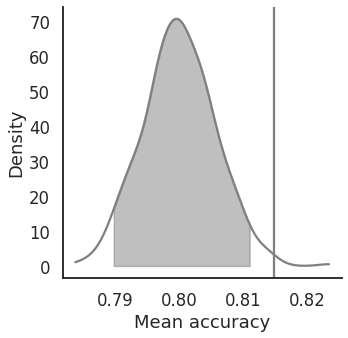

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [14]:
import numpy as np

In [15]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [16]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'], n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.571429
                                   2            0.523810
                                   3            0.555556
                                   4            0.539683
                                   5            0.571429
...                                                  ...
3           8          CD          496          0.870370
                                   497          0.740741
                                   498          0.851852
                                   499          0.814815
                                   500          0.833333

[48000 rows x 1 columns]

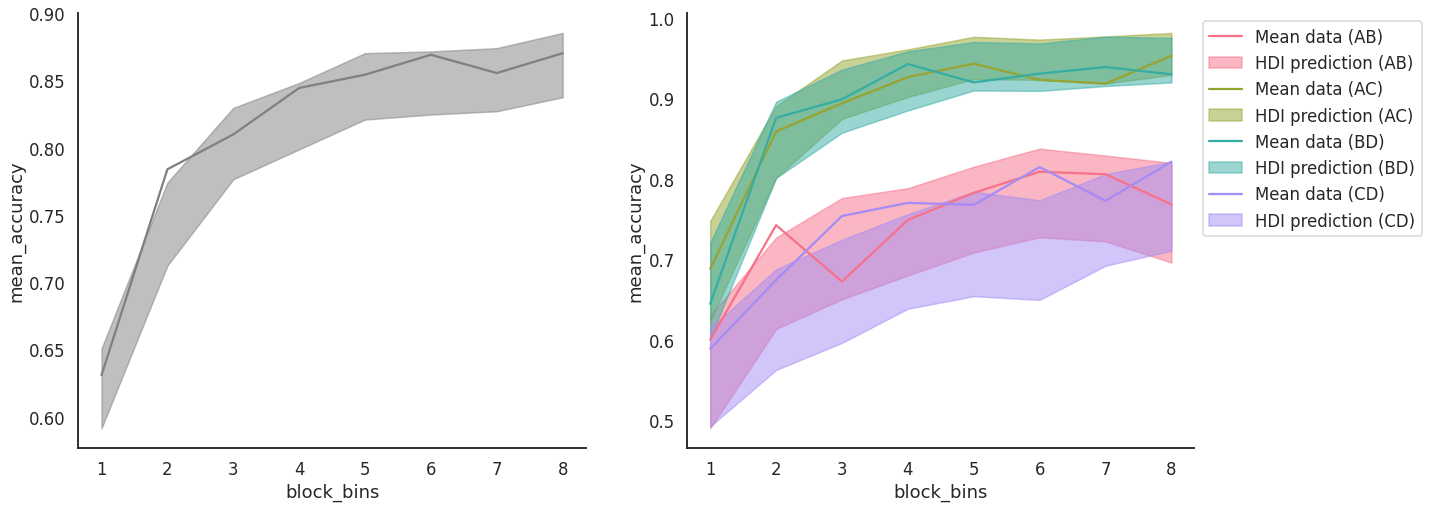

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], n_posterior_predictives=500, ax=axes[1])

sns.despine()